<a href="https://colab.research.google.com/github/vijaysiva576/ANN/blob/main/Tomatomaturitydetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
#from keras.optimizers import adam
from keras.preprocessing import image
import cv2
import datetime

In [42]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [43]:
# building models to classify ripe and unripe tomatos
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [46]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [54]:
training_set = train_datagen.flow_from_directory(
       '/content/sample_data/Tomatomaturitydetection/train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

Found 20 images belonging to 3 classes.


In [55]:
test_set = test_datagen.flow_from_directory(
        '/content/sample_data/Tomatomaturitydetection/test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 10 images belonging to 3 classes.


In [56]:
model_saved=model.fit_generator(
        training_set,
        epochs=15,
        validation_data=test_set,

        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/15
2/2 [==============================] - 2s 788ms/step - loss: -1.0708 - accuracy: 0.3500 - val_loss: -3.5562 - val_accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 1s 224ms/step - loss: -4.2721 - accuracy: 0.5000 - val_loss: -12.7040 - val_accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 1s 483ms/step - loss: -18.2113 - accuracy: 0.5000 - val_loss: -31.9332 - val_accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 1s 533ms/step - loss: -43.2552 - accuracy: 0.5000 - val_loss: -68.8936 - val_accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 1s 247ms/step - loss: -73.4171 - accuracy: 0.5000 - val_loss: -138.4321 - val_accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 1s 489ms/step - loss: -181.9871 - accuracy: 0.5000 - val_loss: -256.8319 - val_accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 1s 568ms/step - loss: -325.7404 - accuracy: 0.5000 - val_loss: -442.7995 - val_accurac

In [57]:
model.save('mymodel.h5',model_saved)

In [58]:
mymodel=load_model('mymodel.h5')

In [59]:
import cv2
import matplotlib.pyplot as plt

In [60]:
test_image=image.load_img('/content/sample_data/Tomatomaturitydetection/test/ripe/ripe1.jpg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("ripe")
else:
  print("unripe")

unripe


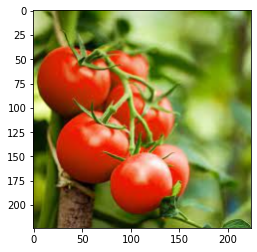

In [61]:
im = cv2.imread('/content/sample_data/Tomatomaturitydetection/test/ripe/ripe2.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [62]:
test_image=image.load_img('/content/sample_data/Tomatomaturitydetection/test/ripe/ripe5.jpg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("ripe")
else:
  print("unripe")

unripe
